In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

data_dir = './data/'

In [2]:
f_app = os.path.join(data_dir,'application_train.csv')
df = pd.read_csv(f_app)

df.shape

(307511, 122)

In [3]:
df.CODE_GENDER.replace(to_replace = 'XNA', value = 'M', inplace = True)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        if len(df[col].unique()) <= 2:
            df[col] = le.fit_transform(df[col])
print(df.shape)
df.head(5)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['DAYS_EMPLOYED_WEIRD'] = df.DAYS_EMPLOYED == 365243
df.DAYS_EMPLOYED.replace(to_replace = 365243, value = np.nan, inplace = True)

df.DAYS_BIRTH = abs(df.DAYS_BIRTH)

In [6]:
correlationData = df.corr()['TARGET']

In [7]:
correlationData = correlationData.sort_values(ascending = False)
largeCorrelation = correlationData[1:16]
smallCorrelation = correlationData[len(correlationData)-15:len(correlationData)]

In [8]:
print('top 15 data which most correlate with TARGET:\n\n', largeCorrelation)
print('\n\ntop 15 data which less correlate with TARGET:\n\n', smallCorrelation)

top 15 data which most correlate with TARGET:

 DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
CODE_GENDER                    0.054704
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64


top 15 data which less correlate with TARGET:

 LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645


Correlation of days employed and own car age :  0.011158567826794497


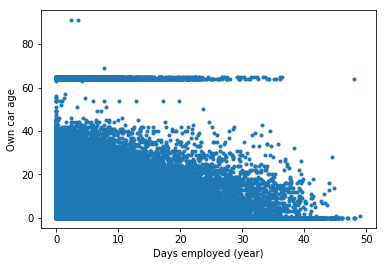

In [9]:
sub_data = df[df.DAYS_EMPLOYED != 365243]
sub_data.DAYS_EMPLOYED = sub_data.DAYS_EMPLOYED/(-365)
sub_data.OWN_CAR_AGE = sub_data.OWN_CAR_AGE.fillna(0)
sub_data.DAYS_EMPLOYED = sub_data.DAYS_EMPLOYED.fillna(0)
print('Correlation of days employed and own car age : ', np.corrcoef( sub_data.DAYS_EMPLOYED ,sub_data.OWN_CAR_AGE )[0][1])


plt.plot(sub_data.DAYS_EMPLOYED,sub_data.OWN_CAR_AGE, '.')
plt.xlabel('Days employed (year)')
plt.ylabel('Own car age')

plt.show()

The data at 6x of OWN car age seems really weird.

Correlation of code gender and LIVE_CITY_NOT_WORK_CITY:  0.13326088186222595


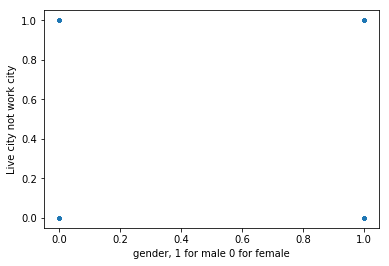

In [14]:
print('Correlation of code gender and LIVE_CITY_NOT_WORK_CITY: ',np.corrcoef(df.CODE_GENDER, df.LIVE_CITY_NOT_WORK_CITY)[0][1])
plt.plot(df.CODE_GENDER,df.LIVE_CITY_NOT_WORK_CITY,'.')
plt.xlabel('gender, 1 for male 0 for female')
plt.ylabel('Live city not work city')

plt.show()

Because code gender and LIVE_CITY_NOT_WORK_CITY are both binary classification dataset. So the scatter will overlap at 4 points. It is pretty hard to see any correlation by their scatter(at least for myself XD).

Correlation of DAYS EMPLOYED and DAYS LAST PHONE CHANGE:  0.12620286237409606


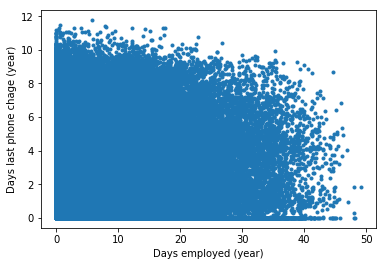

In [25]:
sub_data.DAYS_LAST_PHONE_CHANGE = sub_data.DAYS_LAST_PHONE_CHANGE.fillna(np.mean(sub_data.DAYS_LAST_PHONE_CHANGE))
sub_data.DAYS_LAST_PHONE_CHANGE = sub_data.DAYS_LAST_PHONE_CHANGE/(-365)
print('Correlation of DAYS EMPLOYED and DAYS LAST PHONE CHANGE: ',np.corrcoef(sub_data.DAYS_EMPLOYED,sub_data.DAYS_LAST_PHONE_CHANGE)[0][1])
plt.plot(sub_data.DAYS_EMPLOYED,sub_data.DAYS_LAST_PHONE_CHANGE,'.')
plt.xlabel('Days employed (year)')
plt.ylabel('Days last phone chage (year)')
plt.show()

Correlation of EXT SOURCE 3 and TARGET:  [-0.1789187]


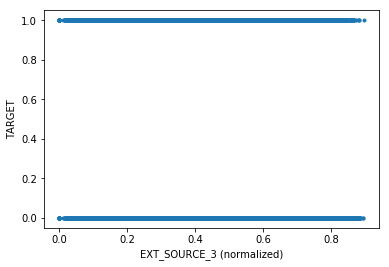

In [30]:
print('Correlation of EXT SOURCE 3 and TARGET: ', smallCorrelation.tail(1).values)
plt.plot(df.EXT_SOURCE_3,df.TARGET,'.')
plt.xlabel('EXT_SOURCE_3 (normalized)')
plt.ylabel('TARGET')
plt.show()